In [20]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

In [24]:
heart_data <- read_excel("data/heart_disease.xlsx") |>
                        mutate(ca = as.numeric(ca), thal = as.numeric(thal), num = as.factor(num)) |>
                        na.omit()
                    

# Split data (training 70% test 30%)
heart_split <- initial_split(heart_data, prop = 0.70, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

# Cross-Validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
heart_train

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
54,1,4,140,239,0,0,160,0,1.2,1,0,3,0


In [25]:
# KNN Steps
k_vals <- tibble(neighbors = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)) # K-Values you want to test out

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_recipe <- recipe(num ~ . , data = heart_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())


heart_fit <- workflow() |>
                     add_recipe(heart_recipe) |>
                     add_model(knn_spec) |>
                     tune_grid(resamples = heart_vfold, grid = k_vals)

heart_results <- collect_metrics(heart_fit)

accuracies <- heart_results |>
              filter(.metric == "accuracy")
accuracies

→ A | warning: No observations were detected in `truth` for level(s): '63'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x4

There were issues with some computations   A: x4





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.4536364,5,0.05052718,Preprocessor1_Model01
3,accuracy,multiclass,0.5111255,5,0.02701552,Preprocessor1_Model02
4,accuracy,multiclass,0.5397619,5,0.02322375,Preprocessor1_Model03
5,accuracy,multiclass,0.5638528,5,0.02207612,Preprocessor1_Model04
6,accuracy,multiclass,0.5640693,5,0.02346247,Preprocessor1_Model05
7,accuracy,multiclass,0.5633766,5,0.02327571,Preprocessor1_Model06
8,accuracy,multiclass,0.5774459,5,0.02629807,Preprocessor1_Model07
9,accuracy,multiclass,0.5874459,5,0.02010868,Preprocessor1_Model08
10,accuracy,multiclass,0.5876840,5,0.01717797,Preprocessor1_Model09


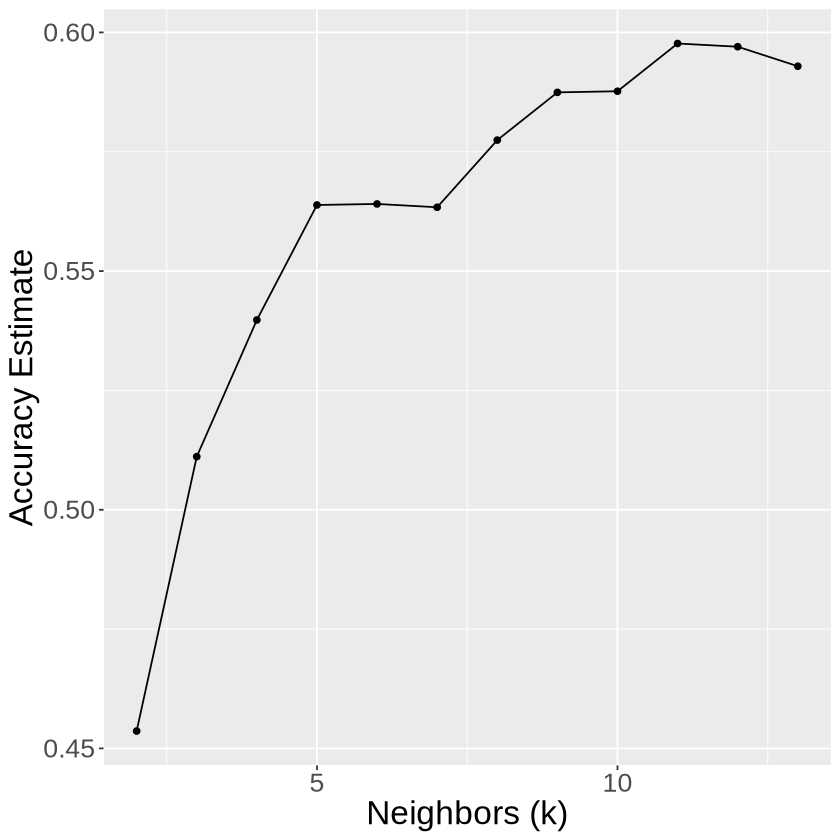

In [26]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors (k)", y = "Accuracy Estimate") +
       theme(text = element_text(size = 20)) 
       # scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       # scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot
# K = 10 is the best K - value